In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [2]:
# Reading the CSV train data
train = pd.read_csv('E:\Analytics Practice\Data sets\AV_Big_Mart_SalesPredict.csv')

In [3]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [5]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
# Univariate Analysis
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


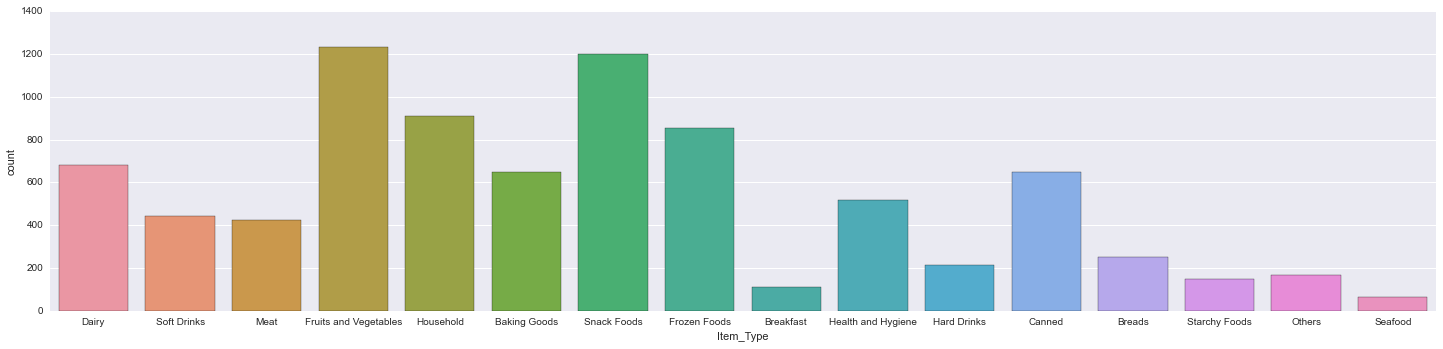

In [7]:
import seaborn as sns
sns.factorplot('Item_Type',data=train,kind='count',size=5,aspect=4)

In [17]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
dtype: int64

In [19]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
dtype: int64

In [21]:
train['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

C:\Users\mtare\AppData\Local\Continuum\Anaconda\lib\site-packages\pandas\tools\plotting.py:2633: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


{'boxes': [<matplotlib.lines.Line2D at 0x1b1365f8>],
 'caps': [<matplotlib.lines.Line2D at 0x1b159358>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b12c3c8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1b159e10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1b136860>,
  <matplotlib.lines.Line2D at 0x1b136e48>]}

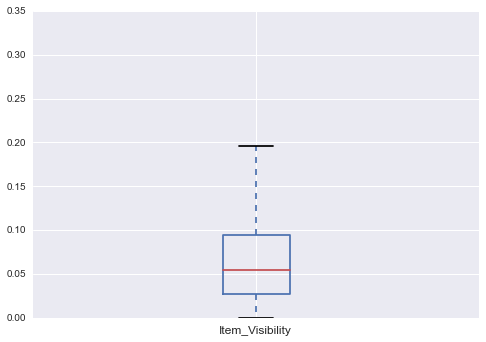

In [22]:
train.boxplot('Item_Visibility')

In [25]:
train[train['Item_Visibility'] > 0.05]['Item_Type'].value_counts()

Fruits and Vegetables    652
Snack Foods              627
Frozen Foods             466
Household                428
Dairy                    400
Baking Goods             365
Canned                   335
Health and Hygiene       233
Soft Drinks              218
Meat                     202
Breads                   146
Hard Drinks              112
Breakfast                 88
Starchy Foods             86
Others                    74
Seafood                   40
dtype: int64

In [27]:
train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x1d10c7f0>],
 'caps': [<matplotlib.lines.Line2D at 0x1d110518>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d1215c0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1d121048>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1d10c978>,
  <matplotlib.lines.Line2D at 0x1d10cf60>]}

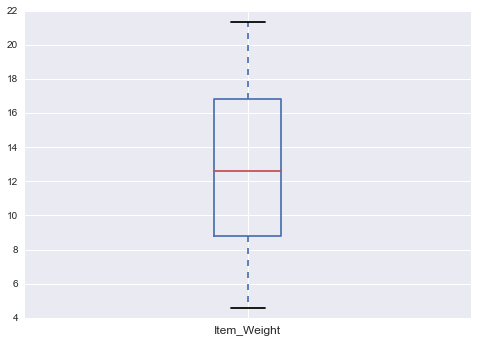

In [28]:
train.boxplot('Item_Weight')

In [29]:
train['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [31]:
train['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [32]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [33]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
dtype: int64

In [34]:
train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [38]:
# Seeing number of stores per Outlet Type
train.groupby('Outlet_Type')['Outlet_Identifier'].count()

Outlet_Type
Grocery Store        1083
Supermarket Type1    5577
Supermarket Type2     928
Supermarket Type3     935
Name: Outlet_Identifier, dtype: int64

In [40]:
train['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [41]:
# Seeing number of stores per Establishment Year
train.groupby('Outlet_Establishment_Year')['Outlet_Identifier'].count()

Outlet_Establishment_Year
1985    1463
1987     932
1997     930
1998     555
1999     930
2002     929
2004     930
2007     926
2009     928
Name: Outlet_Identifier, dtype: int64

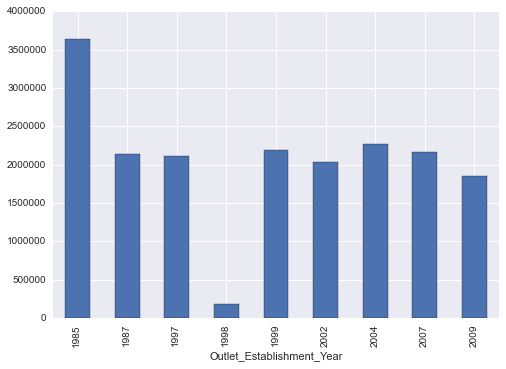

In [43]:
train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum().plot(kind='bar')

In [49]:
train[train['Outlet_Establishment_Year'] == 1998]['Item_Outlet_Sales']

3       False
28      False
30      False
45      False
65      False
90      False
122     False
133     False
139     False
174     False
175     False
177     False
205     False
209     False
214     False
215     False
216     False
217     False
278     False
286     False
317     False
325     False
387     False
411     False
420     False
477     False
483     False
493     False
502     False
510     False
        ...  
8007    False
8043    False
8054    False
8058    False
8063    False
8094    False
8107    False
8110    False
8116    False
8152    False
8204    False
8235    False
8237    False
8239    False
8241    False
8261    False
8269    False
8284    False
8291    False
8296    False
8318    False
8336    False
8365    False
8371    False
8399    False
8400    False
8432    False
8473    False
8486    False
8509    False
Name: Item_Outlet_Sales, dtype: bool

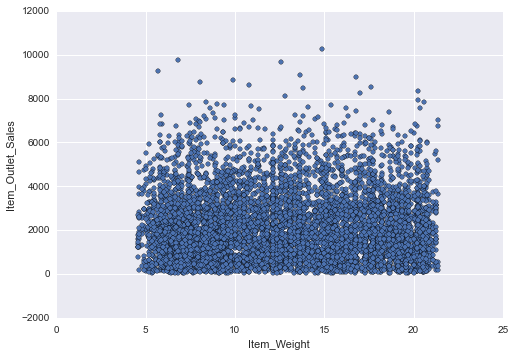

In [50]:
## Bivariate/Multivariate Analysis##
train.plot('Item_Weight','Item_Outlet_Sales',kind='scatter')

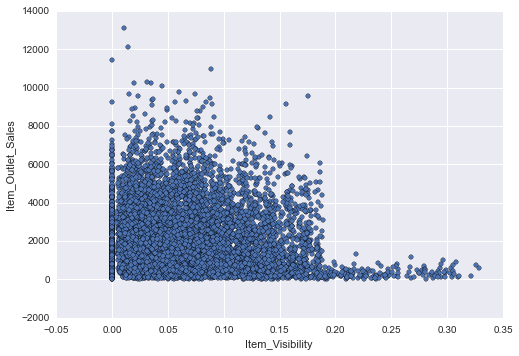

In [51]:
train.plot('Item_Visibility','Item_Outlet_Sales',kind='scatter')

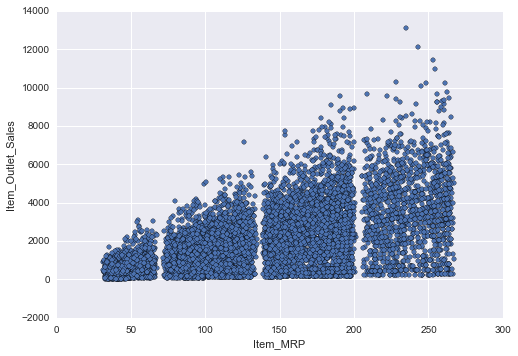

In [53]:
train.plot('Item_MRP','Item_Outlet_Sales',kind='scatter')

In [55]:
train['Log_Item_Outlet_Sales'] = np.log(train['Item_Outlet_Sales'])

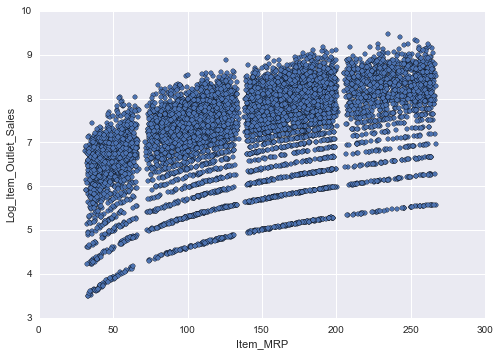

In [58]:
train.plot('Item_MRP','Log_Item_Outlet_Sales',kind='scatter')

<h4> Checking and Handling the Missing Values </h4>

In [8]:
train.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
train['Item_Weight'].unique()

array([  9.3  ,   5.92 ,  17.5  ,  19.2  ,   8.93 ,  10.395,  13.65 ,
           nan,  16.2  ,  11.8  ,  18.5  ,  15.1  ,  17.6  ,  16.35 ,
         9.   ,  13.35 ,  18.85 ,  14.6  ,  13.85 ,  13.   ,   7.645,
        11.65 ,   5.925,  19.25 ,  18.6  ,  18.7  ,  17.85 ,  10.   ,
         8.85 ,   9.8  ,  13.6  ,  21.35 ,  12.15 ,   6.42 ,  19.6  ,
        15.85 ,   7.39 ,  10.195,   9.895,  10.895,   7.905,   9.195,
         8.365,   7.97 ,  17.7  ,  19.35 ,   8.645,  15.6  ,  18.25 ,
         7.855,   7.825,   8.39 ,  12.85 ,  19.   ,   5.905,   7.76 ,
        16.75 ,  15.5  ,   6.055,   6.305,  20.85 ,  20.75 ,   8.895,
        19.7  ,   8.75 ,  13.3  ,   8.31 ,  19.75 ,  17.1  ,  10.5  ,
         6.635,  14.15 ,   8.89 ,   9.1  ,   7.5  ,  16.85 ,   7.485,
        11.6  ,  12.65 ,  20.25 ,   8.6  ,  12.6  ,   8.88 ,  20.5  ,
        13.5  ,   7.235,   6.92 ,   8.02 ,  12.8  ,  16.6  ,  14.   ,
        16.   ,  21.25 ,   7.365,  18.35 ,   5.465,   7.27 ,   6.155,
        19.5  ,  15.

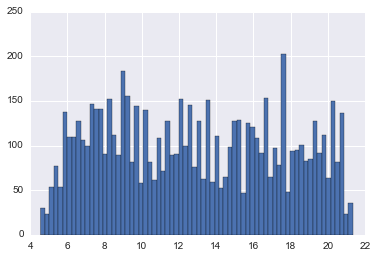

In [41]:
# Missing Value Handling
train['Item_Weight'].hist(bins = 70)

In [9]:
#Determine the average weight per item:
item_avg_weight = train.pivot_table(values='Item_Weight', index='Item_Identifier')

#Get a boolean variable specifying missing Item_Weight values
miss_bool = train['Item_Weight'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print 'Orignal #missing: %d'% sum(miss_bool)
train.loc[miss_bool,'Item_Weight'] = train.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight[x])
print 'Final #missing: %d'% sum(train['Item_Weight'].isnull())

Orignal #missing: 1463
Final #missing: 4


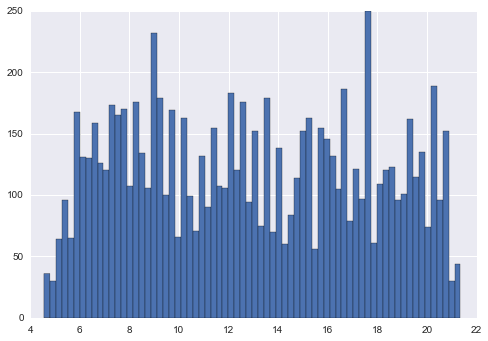

In [10]:
train['Item_Weight'].hist(bins = 70)

In [11]:
train.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
from scipy.stats import mode
df = train.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x)[0]))

C:\Users\mtare\AppData\Local\Continuum\Anaconda\lib\site-packages\numpy\lib\arraysetops.py:198: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


In [13]:
df

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [15]:
miss_bool = train['Outlet_Size'].isnull() 
miss_bool

0       False
1       False
2       False
3        True
4       False
5       False
6       False
7       False
8        True
9        True
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25       True
26      False
27      False
28       True
29      False
        ...  
8493     True
8494     True
8495    False
8496     True
8497    False
8498    False
8499    False
8500     True
8501     True
8502     True
8503    False
8504    False
8505    False
8506    False
8507    False
8508     True
8509     True
8510    False
8511    False
8512    False
8513    False
8514     True
8515    False
8516    False
8517    False
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, dtype: bool

In [16]:
#Impute data and check #missing values before and after imputation to confirm
print '\nOrignal #missing: %d'% sum(miss_bool)
train.loc[miss_bool,'Outlet_Size'] = train.loc[miss_bool,'Outlet_Type'].apply(lambda x: df[x])
print sum(train['Outlet_Size'].isnull())


Orignal #missing: 2410
0


In [20]:
train['Outlet_Size'].value_counts()

Small     4798
Medium    2793
High       932
dtype: int64

In [17]:
train.apply(lambda x: sum(x.isnull()))

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

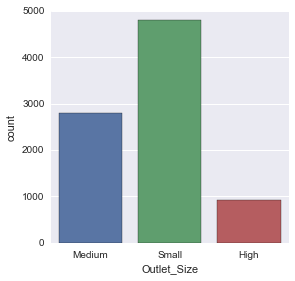

In [92]:
sns.factorplot('Outlet_Size',data=train,kind='count')

In [18]:
train.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [19]:
# Visibility imputation for values  - 0
#Determine average visibility of a product
visibility_avg = train.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
miss_bool = (train['Item_Visibility'] == 0)

print 'Number of 0 values initially: %d'%sum(miss_bool)
train.loc[miss_bool,'Item_Visibility'] = train.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg[x])
print 'Number of 0 values after modification: %d'%sum(train['Item_Visibility'] == 0)

Number of 0 values initially: 526
Number of 0 values after modification: 0


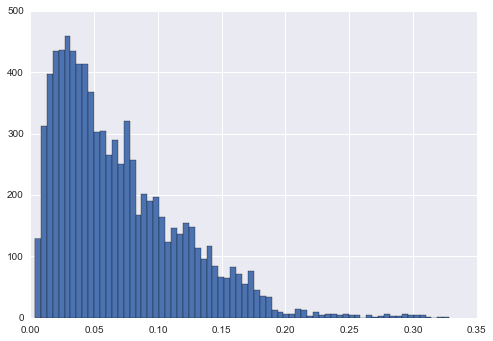

In [20]:
train['Item_Visibility'].hist(bins = 70)

In [21]:
visibility_avg

Item_Identifier
DRA12    0.031956
DRA24    0.048062
DRA59    0.134718
DRB01    0.082126
DRB13    0.008002
DRB24    0.020624
DRB25    0.077305
DRB48    0.023700
DRC01    0.019219
DRC12    0.037893
DRC13    0.024409
DRC24    0.024942
DRC25    0.048159
DRC27    0.064754
DRC36    0.035994
DRC49    0.065327
DRD01    0.061336
DRD12    0.066284
DRD13    0.049132
DRD15    0.068376
DRD24    0.033784
DRD25    0.083190
DRD27    0.022682
DRD37    0.015199
DRD49    0.168146
DRD60    0.041920
DRE01    0.223469
DRE03    0.026604
DRE12    0.058933
DRE13    0.027692
           ...   
NCX05    0.114419
NCX06    0.018058
NCX17    0.114049
NCX18    0.008079
NCX29    0.105121
NCX30    0.029970
NCX41    0.017006
NCX42    0.006621
NCX53    0.019964
NCX54    0.052715
NCY05    0.055038
NCY06    0.061269
NCY17    0.130494
NCY18    0.033510
NCY29    0.084540
NCY30    0.025960
NCY41    0.083071
NCY42    0.015173
NCY53    0.046842
NCY54    0.177540
NCZ05    0.072662
NCZ06    0.104338
NCZ17    0.075130
NCZ18    0.1

In [23]:
# Divising a new Feature called Mean Item Visibilty ratio
train['Item_Visibility_MeanRatio'] = train.apply(lambda x: x['Item_Visibility']/visibility_avg[x['Item_Identifier']], axis=1)
print train['Item_Visibility_MeanRatio'].describe()

count    8523.000000
mean        1.061715
std         0.237149
min         0.678833
25%         0.903570
50%         1.000000
75%         1.055863
max         2.729420
Name: Item_Visibility_MeanRatio, dtype: float64


In [24]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_MeanRatio
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.922960
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1.003057
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.831990
3,FDX07,19.200,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,1.000000
4,NCD19,8.930,Low Fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1.000000
5,FDP36,10.395,Regular,0.060928,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,1.000000
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,1.197758
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,0.994678
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986,0.903997
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350,0.873609


In [26]:
# Devising a new broad category variable
#Get the first two characters of ID:
train['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x: x[0:2])

In [27]:
train['Item_Type_Combined']

0       FD
1       DR
2       FD
3       FD
4       NC
5       FD
6       FD
7       FD
8       FD
9       FD
10      FD
11      FD
12      FD
13      FD
14      FD
15      FD
16      NC
17      FD
18      DR
19      FD
20      FD
21      FD
22      NC
23      FD
24      FD
25      NC
26      FD
27      DR
28      FD
29      FD
        ..
8493    FD
8494    NC
8495    FD
8496    FD
8497    FD
8498    NC
8499    NC
8500    NC
8501    FD
8502    NC
8503    FD
8504    NC
8505    FD
8506    DR
8507    FD
8508    FD
8509    FD
8510    FD
8511    FD
8512    FD
8513    FD
8514    FD
8515    FD
8516    NC
8517    FD
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: Item_Type_Combined, dtype: object

In [28]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_MeanRatio,Item_Type_Combined
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.922960,FD
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1.003057,DR
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.831990,FD
3,FDX07,19.200,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,1.000000,FD
4,NCD19,8.930,Low Fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1.000000,NC
5,FDP36,10.395,Regular,0.060928,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,1.000000,FD
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,1.197758,FD
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,0.994678,FD
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986,0.903997,FD
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350,0.873609,FD


In [30]:
#Rename them to more intuitive categories:
train['Item_Type_Combined'] = train['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
train['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
dtype: int64

In [31]:
train['Item_Type_Combined'].unique()

array(['Food', 'Drinks', 'Non-Consumable'], dtype=object)

In [33]:
#Change categories of low fat:
print train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
dtype: int64


In [34]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].map({
       'Low Fat' : 'Low Fat' ,
        'Regular': 'Regular Fat',
        'reg' : 'Regular Fat',
        'low fat': 'Low Fat' 
    })

In [35]:
train['Item_Fat_Content'].value_counts()

Low Fat        5201
Regular Fat    3006
dtype: int64

In [37]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Visibility_MeanRatio    float64
Item_Type_Combined            object
dtype: object

In [39]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
train['Outlet'] = le.fit_transform(train['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i])

In [40]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
Item_Visibility_MeanRatio    float64
Item_Type_Combined             int32
Outlet                         int32
dtype: object

In [45]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import cross_validation, metrics
def modelfit(alg, dtrain, dtest, predictors, target, IDcol):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print "\nModel Report"
    print "RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions))
    print "CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])

In [46]:
dependent_var = 'Item_Outlet_Sales'
independent_var = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
model = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(model, train, train, independent_var, dependent_var, IDcol)


Model Report
RMSE : 1484
CV Score : Mean - 1488 | Std - 67.53 | Min - 1352 | Max - 1647


In [59]:
dependent_var = 'Item_Outlet_Sales'
independent_var = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
model = RandomForestRegressor(max_depth=10, min_samples_leaf=100)
modelfit(model, train, train, independent_var, dependent_var, IDcol)


Model Report
RMSE : 1.481
CV Score : Mean - 3.781 | Std - 1.843 | Min - 1.525 | Max - 9.51


In [58]:
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), independent_var), 
             reverse=True)

Features sorted by their score:
[(0.9866, 'Outlet_Type'), (0.0068, 'Outlet'), (0.0039, 'Item_Type_Combined'), (0.0022, 'Item_Fat_Content'), (0.0005, 'Outlet_Location_Type'), (0.0001, 'Outlet_Size')]


In [60]:
dependent_var = 'Item_Outlet_Sales'
independent_var = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
model = LinearRegression()
modelfit(model, train, train, independent_var, dependent_var, IDcol)


Model Report
RMSE : 430.4
CV Score : Mean - 430.5 | Std - 12.48 | Min - 406.9 | Max - 449.4


In [ ]:
cross_validation.cross_val_score()